# Importing Dataset and Libraries

In [111]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [112]:
dataset_path = "/Users/debangshi/downloads/ML_Dataset"

In [113]:
images = []
labels = []

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            image = Image.open(file_path)
            image = image.resize((224, 224))  
            image = np.array(image) / 255.0 
            images.append(image)
            labels.append(folder)

In [114]:
len(images)

300

In [126]:
label_encoder=LabelEncoder()
labels =  label_encoder.fit_transform(labels)

# Test Train Split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(images,labels, test_size=0.2, random_state=42)

In [117]:
image_shape=X_train[1].shape

# Reshaping the Images

In [84]:
X_train = np.array(X_train).reshape(len(X_train), -1)
X_test = np.array(X_test).reshape(len(X_test), -1)

In [85]:
X_train[1].shape

(150528,)

# Building multiple models to identify the best algorithm:

# SVM

In [61]:
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [62]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [63]:
accuracy_score(y_test, y_pred_test)


0.6166666666666667

# RandomForest

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
classifier = RandomForestClassifier(n_estimators=150, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [13]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred_test)

0.6166666666666667

# DecisionTree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred_test)

0.4666666666666667

# KNearestNeighbors

In [15]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=10)

In [16]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [17]:
accuracy_score(y_test, y_pred_test)

0.36666666666666664

# Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [19]:
y_pred = gnb.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score as acc
acc(y_test,y_pred)

0.4666666666666667

# Ensemble-Averaging
# RandomForest, SVM

In [58]:
model1 = RandomForestClassifier(n_estimators=150, random_state=42)
model2= SVC(kernel='linear')

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
y_pred1=model1.predict(X_test)
y_pred2=model2.predict(X_test)

y_finalpred=((y_pred1+y_pred2)/2).astype(int)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_finalpred)

0.5833333333333334

# Ensemble-Max Voting
# RandomForest, SVM

In [60]:
from sklearn.ensemble import VotingClassifier

model1.probability = True
model2.probability = True

model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='soft', n_jobs=-1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6666666666666666

# Ensemble-Weighted Average
# RandomForest, SVM

In [56]:
y_finalpred=(y_pred1*0.5+y_pred2*0.5).astype(int)
accuracy_score(y_test, y_finalpred)

0.5833333333333334

# Conclusion and Result

In [65]:
print(f'Comparing the accuracy of all the above models we can conclude that the model built using ensemble-Max Voting with models of RandomForest and SVM give the most accurate results.')

Comparing the accuracy of all the above models we can conclude that the model built using ensemble-Max Voting with models of RandomForest and SVM give the most accurate results.


# Prediction:
#### Any random image from the test dataset  

In [105]:
random_index = np.random.randint(0, len(X_test))
random_image = X_test[random_index]
true_label = y_test[random_index]

In [106]:
predicted_label = model.predict(np.array([random_image]))[0]

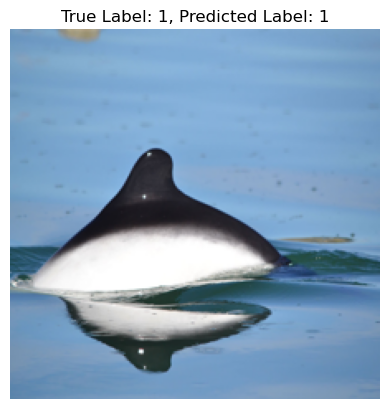

In [118]:
import matplotlib.pyplot as plt
random_image = random_image.reshape(image_shape)
plt.imshow(random_image) 
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()